<h1 align="center"> UNIVERSIDAD NACIONAL DE INGENIERIA</h1> 
<h1 align="center"> Inteligencia Artificial</h1> 
<h3 align="center"> Proyecto Final Parte 01 - Extracción de características </h3> 
<h4 align="center">  Cristian Lazo : mecatronico.lazo@gmail.com</h4> 
<h4 align="center"> Frank Solis : so_ni_mf@hotmail.com   </h4> 
<h4 align="center"> Diego Quispe  : dquispec@uni.pe   </h4> 
<h4 align="center"> Docente    : Paul Antonio Cardenas Lizana </h4> 



--------------------------------

**Resumen  :**  Los usuarios de una línea telefónica son propensos a portar a otro operador, por ende es necesario saber previamente si esto va a suceder para que la empresa pueda emplear medidas para que esto no suceda. El proyecto presente tiene dos objetivos principales: la clasificación usuarios que portan o no y la interpretación del modelo para identificar las razones especificas de la portabilidad de los clientes.


--------------------------

<a id="1"></a> 

# 1. INDICE


* [1. INDICE](#1)
* [2. DATASET](#2)
* [3. MÉTRICA](#3)
* [4. IMPORTANDO LIBRERIAS](#4)
* [5. CARGAR DATA](#5)
* [6. DATA EXPLORATION and FEATURES CREATION](#6)
* [7. PROBANDO PCA PARA REDUCIR LOS FEATURES](#7)
* [8. USANDO LOS FEATURES HALLADOS EN EL ARCHIVO PROYECTO_FINAL_02](#8)
* [9. CONTINUAR ARCHIVO PROYECTO_FINAL_02](#9)




<a id="2"></a> 

# 2. DATASET

Consta de 6 archivos

- TRAIN_TARGET : 2 variables
- TRAIN_FUENTE_PLANTAPOST : 10 variables 
- TRAIN_FUENTE_EQUIPOS : 18 variables
- TRAIN_FUENTE_DATOS : 10 variables
- TRAIN_FUENTE_VOZ : 29 variables
- TRAIN_FUENTE_APLICACIONES : 14 variables
- TRAIN_FUENTE_CONSULTA_PREV_PORTA : 3 variables


<a id="3"></a> 

# 3. METRICA

La métrica de evaluación usaremos es el AUC, para entenderlo primero haremos unas definiciones:


### CURVA ROC

Una **curva ROC (curva de característica operativa del recepto)** es un gráfico que muestra el rendimiento de un modelo de clasificación en todos los umbrales de clasificación. Esta curva representa dos parámetros:
- Tasa de verdaderos positivos
- Tasas de falsos positivos

**Tasa de verdaderos positivos (TPR)** es sinónimo de exhaustividad y, por lo tanto, se define de la siguiente manera:

\begin{equation}
TPR = \frac{VP}{VP+FN}
\end{equation}


**Tasa de falsos positivos (FPR)**  se define de la siguiente manera:

\begin{equation}
FPR = \frac{FP}{FP+VN}
\end{equation}


Una curva ROC representa TPR frente a FPR en diferentes umbrales de clasificación. Reducir el umbral de clasificación clasifica más elementos como positivos, por lo que aumentarán tanto los falsos positivos como los verdaderos positivos. En la siguiente figura, se muestra una curva ROC típica.
Para calcular los puntos en una curva ROC, podríamos evaluar un modelo de regresión logística muchas veces con diferentes umbrales de clasificación, pero esto es ineficiente. Afortunadamente, existe un algoritmo eficiente basado en ordenamiento que puede brindarnos esta información, denominado AUC.

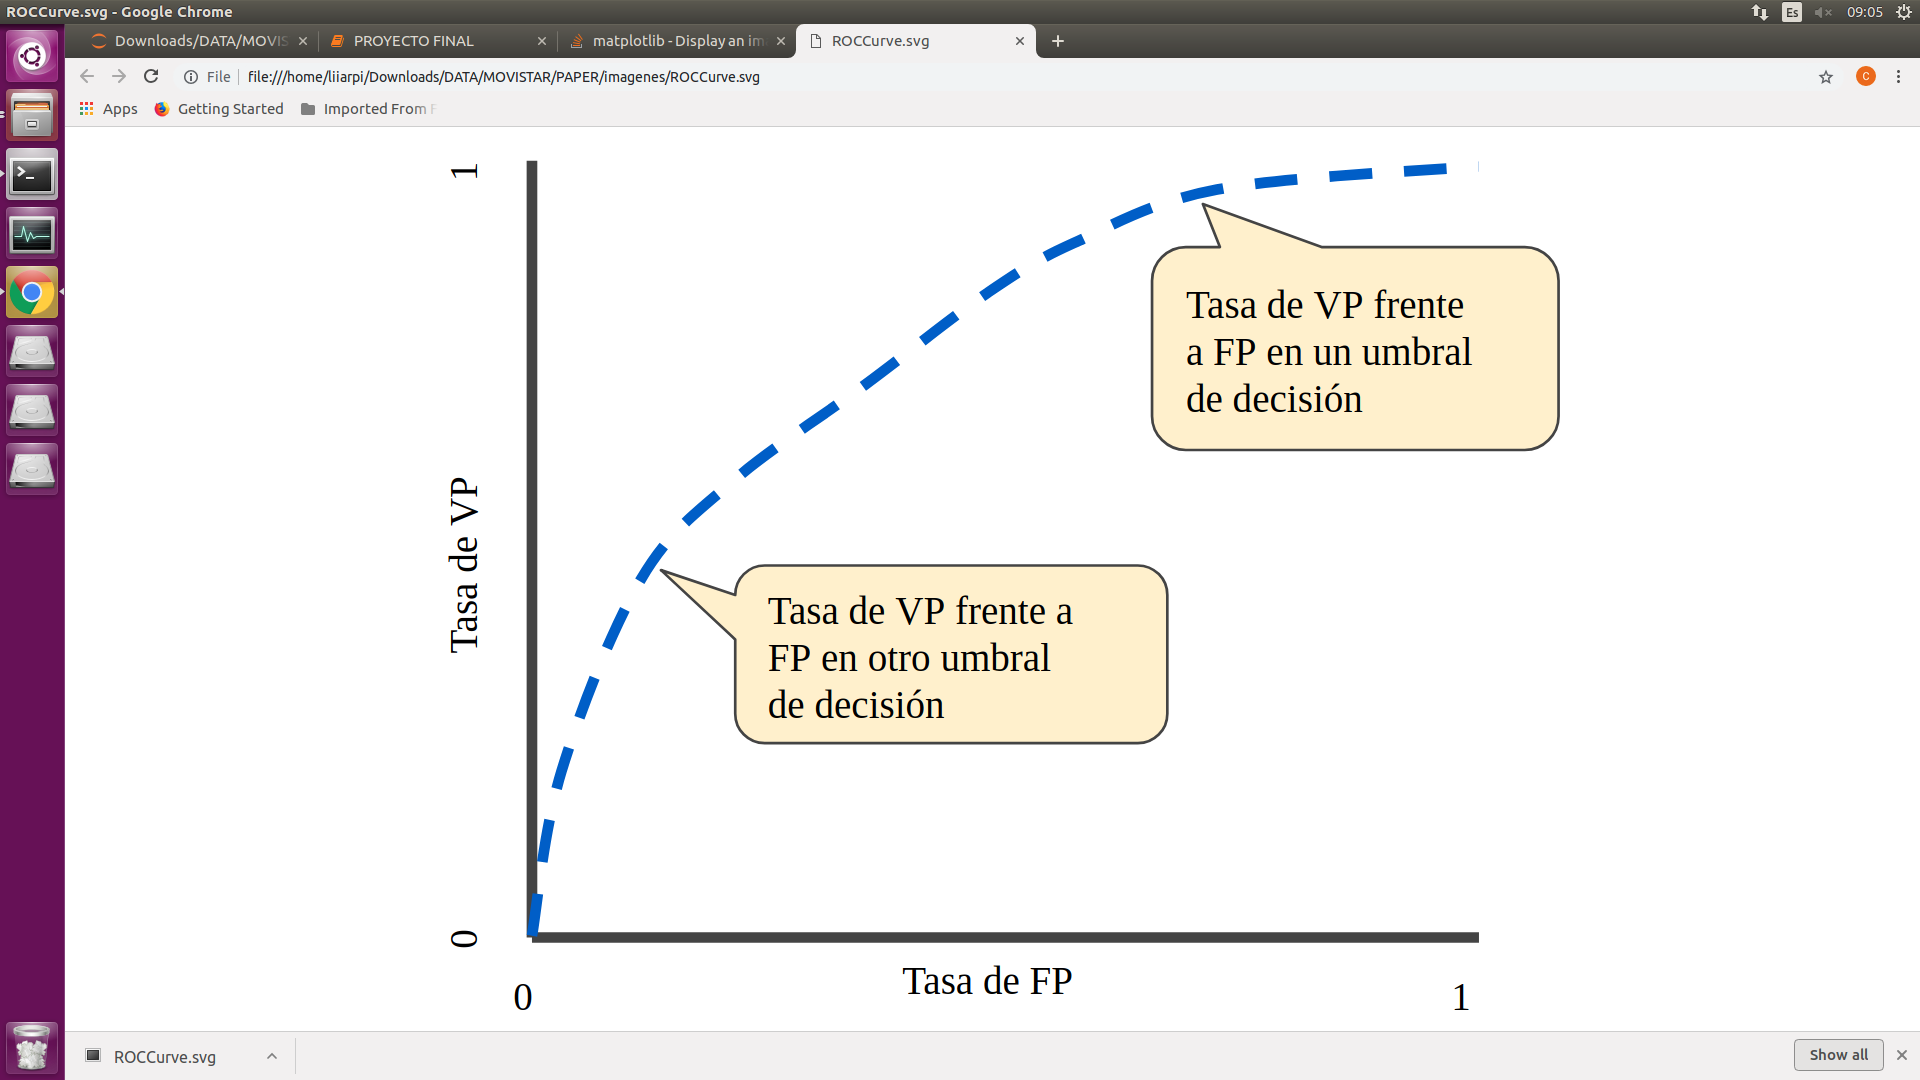

In [0]:
from PIL import Image
Image.open('/home/liiarpi/Downloads/DATA/MOVISTAR/PAPER/imagenes/roc.png')

### AUC : Área bajo la curva ROC 

**AUC** significa "área bajo la curva ROC". Esto significa que el AUC mide toda el área bidimensional por debajo de la curva ROC completa (piensa en un cálculo integral) de (0,0) a (1,1).


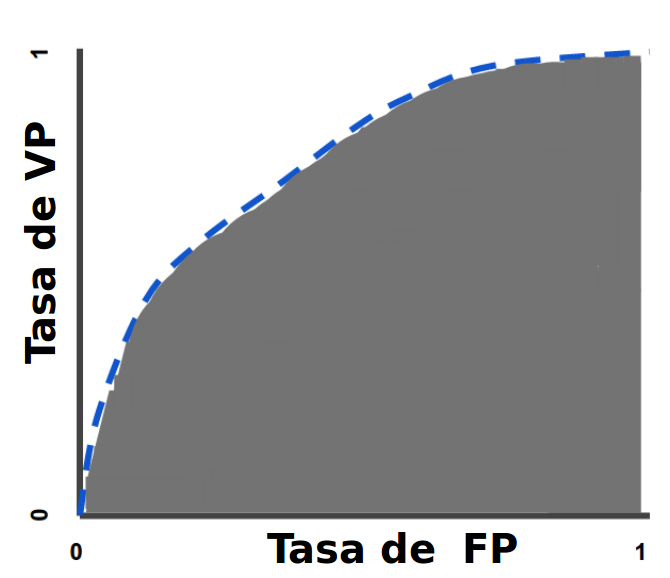

In [0]:
Image.open('/home/liiarpi/Downloads/DATA/MOVISTAR/PAPER/imagenes/auc.png')

El AUC proporciona una medición agregada del rendimiento en todos los umbrales de clasificación posibles. Una forma de interpretar el AUC es como la probabilidad de que el modelo clasifique un ejemplo positivo aleatorio más alto que un ejemplo negativo aleatorio. Observa, a modo de ilustración, los siguientes ejemplos, que están ordenados de izquierda a derecha en orden ascendente con respecto a las predicciones de regresión logística:

El AUC representa la probabilidad de que un ejemplo aleatorio positivo (verde) se posicione a la derecha de un ejemplo aleatorio negativo (rojo).

El AUC oscila en valor del 0 al 1. Un modelo cuyas predicciones son un 100% incorrectas tiene un AUC de 0.0; otro cuyas predicciones son un 100% correctas tiene un AUC de 1.0.

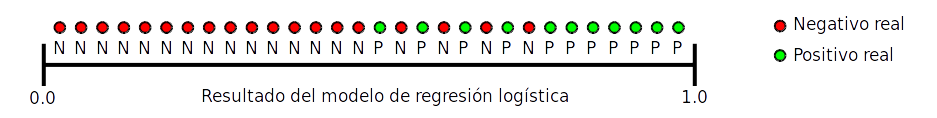

In [0]:
Image.open('/home/liiarpi/Downloads/DATA/MOVISTAR/PAPER/imagenes/cuadri.png')


**Razones por la cual usamos AUC como métrica :**

- El AUC es **invariable con respecto a la escala.** Mide qué tan bien se clasifican las predicciones, en lugar de sus valores absolutos.
- El AUC es **invariable con respecto al umbral de clasificación.** Mide la calidad de las predicciones del modelo, sin tener en cuenta qué umbral de clasificación se elige.


<a id="4"></a> 

# 4. IMPORTAR LIBRERIAS

In [0]:
from librerias3 import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltd
import seaborn as sns
import gc
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

<a id="5"></a> 

# 5. CARGAR DATA

In [0]:
train_path='/home/liiarpi/Downloads/DATA/MOVISTAR/DATA/TRAIN/'
target=pd.read_csv(train_path+'TRAIN_TARGET.txt',sep='|')
tfa   =pd.read_csv(train_path+'TRAIN_FUENTE_APLICACIONES.txt',sep='|',parse_dates=['PERIODO'])
tfc   =pd.read_csv(train_path+'TRAIN_FUENTE_CONSULTA_PREV_PORTA.txt',sep='|',parse_dates=['PERIODO'])
tfd   =pd.read_csv(train_path+'TRAIN_FUENTE_DATOS.txt',sep='|',parse_dates=['PERIODO'])
tfe   =pd.read_csv(train_path+'TRAIN_FUENTE_EQUIPOS.txt',sep='|',parse_dates=['PERIODO'])
tfv   =pd.read_csv(train_path+'TRAIN_FUENTE_VOZ.txt',sep='|',parse_dates=['PERIODO'])
tpp   =pd.read_csv(train_path+'TRAIN_PLANTAPOST.txt',sep='|',parse_dates=['PERIODO'])

In [0]:
target.head()

,ID_CLIENTE,TARGET
0,M4+Yb9VBZlrmolusfk43+6zj9IEiONcbxv8Vo4mDskU=,0
1,7CZN3fc0TkgCt99e2wXhHws0ZdjbidJ13wHbBCWo93s=,0
2,Gato2h7aHbSHatI1jDDmHEgQsm+L0kVqt59jfZLp6vQ=,0
3,a7ydviDHC4D3hefkfTJF9UP3sIJ55tM+Y7OW40bIlKc=,0
4,HY8WUIZd4Bo8uLtyTtFowF+JM3UbqcHEyUaZvOkmp/w=,0


In [0]:
tfc.head()

,PERIODO,ID_CLIENTE,CANT_CONSULTAS_PREV
0,2018-12-01,Q0Sqxt9/+fI5C96Oj0qJZ92xheja1/7MUmzwG9BEJvU=,1
1,2018-11-01,yaomlj6mDsksD3XNE1++B9kjjPmR5IbU/YeZB6/xIt8=,1
2,2018-11-01,4IMVMkE/j892RjRR74zo+H1/vzj+TzyvDsvDqnMoSd8=,1
3,2018-10-01,7tzg/k08GC863JggrB3E2X2aJUqV0KbaRIDqZnDezUs=,1
4,2018-10-01,Wg7CVsL20twXVpeGqtjkCXsJYJC+fIIJyPvdmphPQeE=,1


In [0]:
names=tfa.columns.values 
found_index = np.in1d(names, ['ID_CLIENTE','PERIODO']).nonzero()[0]
names = np.delete(names, found_index)+'_mean'
names

array(['N_DIAS_NAVEGACION_mean', 'APP_1_mean', 'APP_2_mean', 'APP_3_mean',
       'APP_4_mean', 'APP_5_mean', 'APP_6_mean', 'APP_7_mean',
       'APP_8_mean', 'APP_9_mean', 'APP_10_mean', 'MB_TOTAL_APP_mean'],
      dtype=object)

<a id="6"></a> 

# 6. Data Exploration and Feature Creation

In [0]:
def procesar_2(names,df):
    x= df[names]
    names=x.columns.values
    for i in range(0,x.shape[1]):
        namecolumn=names[i]
        x['alta_'+namecolumn]=(x[namecolumn]>(x[namecolumn].mean()+x[namecolumn].std()))
        x['media_'+namecolumn]=(x[namecolumn]<=(x[namecolumn].mean()+x[namecolumn].std()))
        x['media_'+namecolumn]=x['media_'+namecolumn]&(x[namecolumn]>=(x[namecolumn].mean()-x[namecolumn].std()))
        x['baja_'+namecolumn]=(x[namecolumn]<=(x[namecolumn].mean()-x[namecolumn].std()))
        x=x.drop([namecolumn],axis=1)
    x=x.astype('float')
    return x

In [0]:
def agg_numeric(df, group_var):
    # Remove id variables other than grouping variable
    for col in df:
        if col != group_var and 'ID_CLIENTE' in col:
            df = df.drop(columns = col)
            
    group_ids = df[group_var]
    numeric_df = df.select_dtypes('number')
    numeric_df[group_var] = group_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

    # Need to create new column names
    columns = [group_var]

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        # Skip the grouping variable
        if var != group_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s' % (var, stat))

    agg.columns = columns
    print('NUEVOS FEATURES CREADOS')
    return agg
def agg_numeric2(df, group_var):
    # Remove id variables other than grouping variable
    for col in df:
        if col != group_var and 'ID_CLIENTE' in col:
            df = df.drop(columns = col)
            
    group_ids = df[group_var]
    numeric_df = df.select_dtypes('number')
    numeric_df[group_var] = group_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['mean']).reset_index()

    # Need to create new column names
    columns = [group_var]

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        # Skip the grouping variable
        if var != group_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s' % (var, stat))
    agg.columns = columns
    print('NUEVOS FEATURES CREADOS')
    return agg

In [0]:
def procesar_1(path,name):
    df=pd.read_csv(path+name,sep='|', parse_dates=['PERIODO'])
    print(df.shape)
    #names=df.columns.values 
    #found_index = np.in1d(names, ['ID_CLIENTE','PERIODO']).nonzero()[0]
    #names = np.delete(names, found_index)+'_mean'
    #names2=df.columns.values
    #found_index2 = np.in1d(names2, ['PERIODO']).nonzero()[0]
    #names2 = np.delete(names2, found_index2)
    
    #df_date = agg_numeric2(df[['ID_CLIENTE','PERIODO']], group_var = 'ID_CLIENTE')
    
    date_attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end',
    'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    for n in date_attr:
        a = getattr(df['PERIODO'].dt, n.lower())
        #a[a==np.NaN]=0
        a[(1-np.isnan(a))>0.0001]=0
        a[a==np.Inf]=0
        a[a==-np.Inf]=0
        df['PERIODO_' + n]=a.astype(float)
        # 2. Agregamos una columan con una representación numérica de la fecha
        df['PERIODO_elapsed'] = df['PERIODO'].astype(np.int64) // 10 ** 9

    # 3. Eliminamos la variable date
    df.drop('PERIODO', axis=1, inplace=True)
    
    names3=df.columns.values
    found_index3 = np.in1d(names3, ['ID_CLIENTE']).nonzero()[0]
    names3 = np.delete(names3, found_index3)+'_mean'
    
    #VARIABLES OBJECT FLOAT
    for n,col in df.items():
        if not pd.api.types.is_numeric_dtype(col) and n != 'ID_CLIENTE': 
            df[n] = col.astype('category')
    
    for n,col in df.items()  : 
        if pd.api.types.is_categorical_dtype(col) and n != 'ID_CLIENTE':
            df[n] = col.cat.codes+1 
    
    names = df.columns.values 
    aa=df.isna().sum() / len(df) # % de data faltante
    for i in range (0,aa.shape[0]):
        if(aa[i]>0):
            print('DATA FALTANTE -',names[i])
            df[str(names[i])]=df[str(names[i])].fillna(df[str(names[i])].mean())
   
    df = agg_numeric(df, group_var = 'ID_CLIENTE')
    
    #df = agg_numeric(df[names2], group_var = 'ID_CLIENTE')
    #df = pd.merge(df,df_date, on='ID_CLIENTE', how='left')
    #print(df.columns.values)
    #print(names3)
    df2 =procesar_2(names3,df)
  
    df = pd.concat([df,df2], axis=1)
    
    print(df.shape)
    
    return df

In [0]:
a=[2,3,np.NaN,np.Inf]
a[a==np.NaN]=0
a


[0, 3, nan, inf]

In [0]:
train_path='/home/liiarpi/Downloads/DATA/MOVISTAR/DATA/TRAIN/'
df=procesar_1(train_path,'TRAIN_FUENTE_CONSULTA_PREV_PORTA.txt')


(9249, 3)
NUEVOS FEATURES CREADOS
(8524, 113)


In [0]:
train_path='/home/liiarpi/Downloads/DATA/MOVISTAR/DATA/TRAIN/'
df=procesar_1(train_path,'TRAIN_FUENTE_VOZ.txt')

(587474, 29)
DATA FALTANTE - AIRTIME_IN_TOT
DATA FALTANTE - AIRTIME_IN_ON
DATA FALTANTE - AIRTIME_IN_OFF
DATA FALTANTE - CALLS_IN_TOT
DATA FALTANTE - CALLS_IN_ON
DATA FALTANTE - CALLS_IN_OFF
DATA FALTANTE - DAYS_IN_VOICE_TOT
DATA FALTANTE - DAYS_IN_VOICE_ON
DATA FALTANTE - DAYS_IN_VOICE_OFF
DATA FALTANTE - AIRTIME_OUT_TOT
DATA FALTANTE - AIRTIME_OUT_ON
DATA FALTANTE - AIRTIME_OUT_OFF
DATA FALTANTE - CALLS_OUT_TOT
DATA FALTANTE - CALLS_OUT_ON
DATA FALTANTE - CALLS_OUT_OFF
DATA FALTANTE - DEST_VOICE
DATA FALTANTE - DEST_VOICE_ON
DATA FALTANTE - DEST_VOICE_OFF
DATA FALTANTE - DAYS_OUT_VOICE_TOT
DATA FALTANTE - DAYS_OUT_VOICE_ON
DATA FALTANTE - DAYS_OUT_VOICE_OFF
DATA FALTANTE - CONT_TOT
DATA FALTANTE - CONT_ON
DATA FALTANTE - CONT_OFF
DATA FALTANTE - TOP_CONT_5
DATA FALTANTE - TOP_CONT_ON_5
DATA FALTANTE - TOP_CONT_OFF_5
DATA FALTANTE - PERIODO_Year
DATA FALTANTE - PERIODO_Month
DATA FALTANTE - PERIODO_Week
DATA FALTANTE - PERIODO_Day
DATA FALTANTE - PERIODO_Dayofweek
DATA FALTANTE - PERI

In [0]:
path='/home/liiarpi/Downloads/DATA/MOVISTAR'
pathtrain=path+'/DATA/TRAIN/'
pathtest =path+'/DATA/TEST/'
pathguardartrain=path+'/NEW_DATA3/NEW_TRAIN/'
pathguardartest =path+'/NEW_DATA3/NEW_TEST/'

def transformar(pathorigen,path,name):
    df=procesar_1(pathorigen,name+'.txt')
    names = df.columns.values
    df.to_csv(path+name+'.csv',index=None)
    
    

In [0]:
transformar(pathtrain,pathguardartrain,'TRAIN_FUENTE_APLICACIONES')
transformar(pathtrain,pathguardartrain,'TRAIN_FUENTE_CONSULTA_PREV_PORTA')
transformar(pathtrain,pathguardartrain,'TRAIN_FUENTE_DATOS')
transformar(pathtrain,pathguardartrain,'TRAIN_FUENTE_EQUIPOS')
transformar(pathtrain,pathguardartrain,'TRAIN_FUENTE_VOZ')
transformar(pathtrain,pathguardartrain,'TRAIN_PLANTAPOST')

(513548, 14)
NUEVOS FEATURES CREADOS
(180063, 201)
(9249, 3)
NUEVOS FEATURES CREADOS
(8524, 113)
(629997, 10)
DATA FALTANTE - INDICADOR_DATOS_1
DATA FALTANTE - INDICADOR_DATOS_2
NUEVOS FEATURES CREADOS
(209999, 169)
(189225, 18)
NUEVOS FEATURES CREADOS
(189225, 233)
(587474, 29)
DATA FALTANTE - AIRTIME_IN_TOT
DATA FALTANTE - AIRTIME_IN_ON
DATA FALTANTE - AIRTIME_IN_OFF
DATA FALTANTE - CALLS_IN_TOT
DATA FALTANTE - CALLS_IN_ON
DATA FALTANTE - CALLS_IN_OFF
DATA FALTANTE - DAYS_IN_VOICE_TOT
DATA FALTANTE - DAYS_IN_VOICE_ON
DATA FALTANTE - DAYS_IN_VOICE_OFF
DATA FALTANTE - AIRTIME_OUT_TOT
DATA FALTANTE - AIRTIME_OUT_ON
DATA FALTANTE - AIRTIME_OUT_OFF
DATA FALTANTE - CALLS_OUT_TOT
DATA FALTANTE - CALLS_OUT_ON
DATA FALTANTE - CALLS_OUT_OFF
DATA FALTANTE - DEST_VOICE
DATA FALTANTE - DEST_VOICE_ON
DATA FALTANTE - DEST_VOICE_OFF
DATA FALTANTE - DAYS_OUT_VOICE_TOT
DATA FALTANTE - DAYS_OUT_VOICE_ON
DATA FALTANTE - DAYS_OUT_VOICE_OFF
DATA FALTANTE - CONT_TOT
DATA FALTANTE - CONT_ON
DATA FALTANTE - 

In [0]:
transformar(pathtest,pathguardartest,'TEST_FUENTE_APLICACIONES')
transformar(pathtest,pathguardartest,'TEST_FUENTE_CONSULTA_PREV_PORTA')
transformar(pathtest,pathguardartest,'TEST_FUENTE_DATOS')
transformar(pathtest,pathguardartest,'TEST_FUENTE_EQUIPOS')
transformar(pathtest,pathguardartest,'TEST_FUENTE_VOZ')
transformar(pathtest,pathguardartest,'TEST_PLANTAPOST')

(171983, 14)
NUEVOS FEATURES CREADOS
(60309, 201)
(3583, 3)
NUEVOS FEATURES CREADOS
(3305, 113)
(210000, 10)
DATA FALTANTE - INDICADOR_DATOS_1
DATA FALTANTE - INDICADOR_DATOS_2
NUEVOS FEATURES CREADOS
(70000, 169)
(62969, 18)
NUEVOS FEATURES CREADOS
(62969, 233)
(194139, 29)
DATA FALTANTE - AIRTIME_IN_TOT
DATA FALTANTE - AIRTIME_IN_ON
DATA FALTANTE - AIRTIME_IN_OFF
DATA FALTANTE - CALLS_IN_TOT
DATA FALTANTE - CALLS_IN_ON
DATA FALTANTE - CALLS_IN_OFF
DATA FALTANTE - DAYS_IN_VOICE_TOT
DATA FALTANTE - DAYS_IN_VOICE_ON
DATA FALTANTE - DAYS_IN_VOICE_OFF
DATA FALTANTE - AIRTIME_OUT_TOT
DATA FALTANTE - AIRTIME_OUT_ON
DATA FALTANTE - AIRTIME_OUT_OFF
DATA FALTANTE - CALLS_OUT_TOT
DATA FALTANTE - CALLS_OUT_ON
DATA FALTANTE - CALLS_OUT_OFF
DATA FALTANTE - DEST_VOICE
DATA FALTANTE - DEST_VOICE_ON
DATA FALTANTE - DEST_VOICE_OFF
DATA FALTANTE - DAYS_OUT_VOICE_TOT
DATA FALTANTE - DAYS_OUT_VOICE_ON
DATA FALTANTE - DAYS_OUT_VOICE_OFF
DATA FALTANTE - CONT_TOT
DATA FALTANTE - CONT_ON
DATA FALTANTE - CONT

In [0]:
train_path='/home/liiarpi/Downloads/DATA/MOVISTAR/NEW_DATA3/NEW_TRAIN/'
target=pd.read_csv('/home/liiarpi/Downloads/DATA/MOVISTAR/DATA/TRAIN/TRAIN_TARGET.txt',sep='|')
tfa=pd.read_csv(train_path+'TRAIN_FUENTE_APLICACIONES.csv')
tfc=pd.read_csv(train_path+'TRAIN_FUENTE_CONSULTA_PREV_PORTA.csv')
tfd=pd.read_csv(train_path+'TRAIN_FUENTE_DATOS.csv')
tfe=pd.read_csv(train_path+'TRAIN_FUENTE_EQUIPOS.csv')
tfv=pd.read_csv(train_path+'TRAIN_FUENTE_VOZ.csv')
tpp=pd.read_csv(train_path+'TRAIN_PLANTAPOST.csv')

In [0]:
TrainData = pd.merge(target, tfa, how='left')
TrainData = pd.merge(TrainData, tfc, on='ID_CLIENTE', how='left')
TrainData = pd.merge(TrainData, tfd, on='ID_CLIENTE', how='left')
TrainData = pd.merge(TrainData, tfe, on='ID_CLIENTE', how='left')
TrainData = pd.merge(TrainData, tfv, on='ID_CLIENTE', how='left')
TrainData = pd.merge(TrainData, tpp, on='ID_CLIENTE', how='left')


In [0]:
train=pd.read_csv('Data_tratada_Train.csv',na_values=['NaN','nan',-1])

In [0]:
print('tamaño = ', train.shape)
# Presentamos un ejemplo (de 5 datos) del dataset
train.head()

tamaño =  (210000, 578)


,ID_CLIENTE,TARGET,N_DIAS_NAVEGACION_count,N_DIAS_NAVEGACION_mean,N_DIAS_NAVEGACION_max,N_DIAS_NAVEGACION_min,N_DIAS_NAVEGACION_sum,APP_1_count,APP_1_mean,APP_1_max,...,baja_SUB_TOTAL_FACT_mean,alta_EDAD_mean,media_EDAD_mean,baja_EDAD_mean,alta_DIAS_QUEDANPERMANENCIA_mean,media_DIAS_QUEDANPERMANENCIA_mean,baja_DIAS_QUEDANPERMANENCIA_mean,alta_DEPARTAMENTO_mean,media_DEPARTAMENTO_mean,baja_DEPARTAMENTO_mean
0,M4+Yb9VBZlrmolusfk43+6zj9IEiONcbxv8Vo4mDskU=,0,2.0,22.500000,24.0,21.0,45.0,2.0,1720.460000,1920.41,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,7CZN3fc0TkgCt99e2wXhHws0ZdjbidJ13wHbBCWo93s=,0,3.0,29.666667,31.0,28.0,89.0,3.0,372.153333,517.42,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,Gato2h7aHbSHatI1jDDmHEgQsm+L0kVqt59jfZLp6vQ=,0,3.0,30.000000,31.0,28.0,90.0,3.0,257.596667,427.18,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,a7ydviDHC4D3hefkfTJF9UP3sIJ55tM+Y7OW40bIlKc=,0,3.0,28.000000,31.0,26.0,84.0,3.0,781.600000,1042.77,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,HY8WUIZd4Bo8uLtyTtFowF+JM3UbqcHEyUaZvOkmp/w=,0,3.0,29.000000,31.0,27.0,87.0,3.0,933.283333,1230.82,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [0]:
X=train.drop(columns=['ID_CLIENTE', 'TARGET'])
y=train['TARGET']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)

In [0]:
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)
train_data=lgb.Dataset(X_train, y_train)
test_data=lgb.Dataset(X_test, y_test, reference=train_data)

In [0]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'auc'},
    'num_leaves': 20,
    'num_boost_round': 5000,
    'min_data_in_leaf': 50,
    'max_depth': -1,
    'verbose': -1,
    'n_jobs': -1,
    'learning_rate': 0.035
}

In [0]:
model = lgb.train(params,train_data,valid_sets=test_data,early_stopping_rounds=80)

[1]	valid_0's auc: 0.618285
Training until validation scores don't improve for 80 rounds.
[2]	valid_0's auc: 0.623808
[3]	valid_0's auc: 0.626038
[4]	valid_0's auc: 0.626204
[5]	valid_0's auc: 0.62651
[6]	valid_0's auc: 0.627204
[7]	valid_0's auc: 0.626664
[8]	valid_0's auc: 0.626893
[9]	valid_0's auc: 0.627229
[10]	valid_0's auc: 0.627513
[11]	valid_0's auc: 0.627644
[12]	valid_0's auc: 0.627571
[13]	valid_0's auc: 0.627896
[14]	valid_0's auc: 0.628177
[15]	valid_0's auc: 0.628492
[16]	valid_0's auc: 0.628649
[17]	valid_0's auc: 0.629023
[18]	valid_0's auc: 0.62928
[19]	valid_0's auc: 0.629413
[20]	valid_0's auc: 0.629706
[21]	valid_0's auc: 0.629788
[22]	valid_0's auc: 0.629955
[23]	valid_0's auc: 0.629956
[24]	valid_0's auc: 0.630142
[25]	valid_0's auc: 0.630223
[26]	valid_0's auc: 0.630383
[27]	valid_0's auc: 0.630474
[28]	valid_0's auc: 0.630586
[29]	valid_0's auc: 0.630575
[30]	valid_0's auc: 0.630611
[31]	valid_0's auc: 0.630523
[32]	valid_0's auc: 0.630594
[33]	valid_0's auc: 0

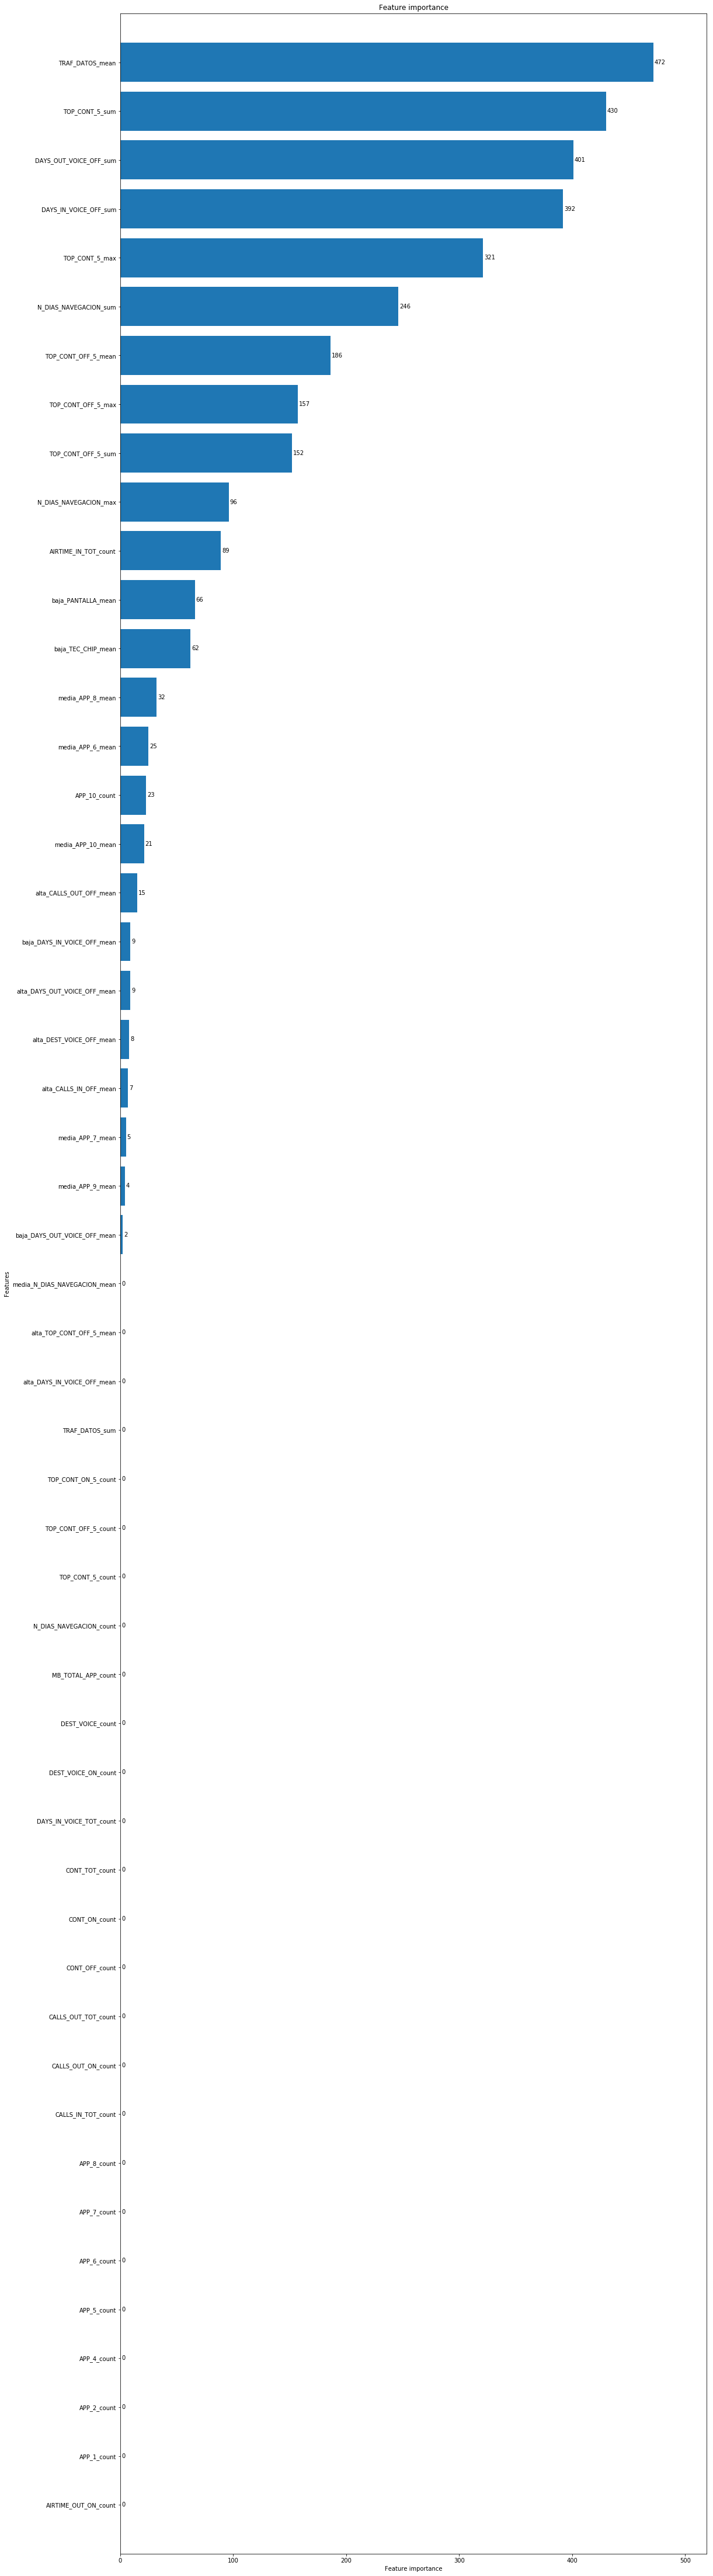

In [0]:
a=lgb.plot_importance(model,importance_type='split',height=0.8,figsize=(18,80),grid=False,ignore_zero=False)

<a id="7"></a> 

# 7.PROBANDO PCA PARA REDUCIR LOS FEATURES

In [0]:
from sklearn.decomposition import PCA
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
def pcaa(a,xx,yy):
    print("PCA de %d elementos"%a)
    pca =PCA(n_components=a)
    pca.fit(xx)
    xx=pca.transform(xx)
    print('pca listo')
    print('USANDO RANDOMFOREST CLASSIFIER')
    xx_train, xx_val, yy_train, yy_val = train_test_split(xx, yy, test_size=0.2, random_state=42)
    mm = RandomForestClassifier(20, n_jobs=-1, oob_score=True,min_samples_split=10)#,max_features=10)
    mm.fit(xx_train,yy_train)
    y_train_pred = mm.predict(xx_train)
    y_val_pred = mm.predict(xx_val)
    print(f'Scores:')
    print(f'Train      = {metrics.accuracy_score(yy_train, y_train_pred):.4}')
    print(f'Validation = {metrics.accuracy_score(yy_val, y_val_pred):.4}')
    if hasattr(mm, 'oob_score_'): print(f'OOB        = {mm.oob_score_:.4}')
    print("AUC Train ",roc_auc_score(yy_train, y_train_pred))
    print("AUC Test ",roc_auc_score(yy_val, y_val_pred))
    print('USANDO SVM')
    '''
    from sklearn.svm import SVC
    model_svm = SVC(gamma='auto')
    model_svm.fit(xx_train,yy_train) 
    y_train_pred = model_svm.predict(xx_train)
    y_val_pred = model_svm.predict(xx_val)
    print("Accuracy Training Support Vector Machines:",metrics.accuracy_score(yy_train, y_train_pred))
    print("Accuracy Validation Support Vector Machines:",metrics.accuracy_score(yy_val, y_val_pred))
    print("AUC Train ",roc_auc_score(yy_train, y_train_pred))
    print("AUC Test ",roc_auc_score(yy_val, y_val_pred))'''
    
    print('USANDO LOGISTIC')
    from sklearn.linear_model import LogisticRegression
    model_logistic = LogisticRegression(random_state=0, solver='lbfgs')
    model_logistic.fit(xx_train, yy_train)
    y_train_pred = model_logistic.predict(xx_train)
    y_val_pred = model_logistic.predict(xx_val)
    print("Accuracy Training Logistic:",metrics.accuracy_score(yy_train, y_train_pred))
    print("Accuracy Validation Logistic:",metrics.accuracy_score(yy_val, y_val_pred))
    print("AUC Train ",roc_auc_score(yy_train, y_train_pred))
    print("AUC Test ",roc_auc_score(yy_val, y_val_pred))

    return mm,pca

In [0]:
pcaa(10,X,y)

PCA de 10 elementos
pca listo
USANDO RANDOMFOREST CLASSIFIER
Scores:
Train      = 0.9365
Validation = 0.9
OOB        = 0.8956
AUC Train  0.6826190476190477
AUC Test  0.5001984126984127
USANDO SVM
USANDO LOGISTIC
Accuracy Training Logistic: 0.8999940476190477
Accuracy Validation Logistic: 0.8999761904761905
AUC Train  0.49999669312169315
AUC Test  0.4999867724867725


(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
             oob_score=True, random_state=None, verbose=0, warm_start=False),
 PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False))

In [0]:
modelo,pca_modelo=pcaa(20,X,y)

PCA de 20 elementos
pca listo
USANDO RANDOMFOREST CLASSIFIER
Scores:
Train      = 0.9405
Validation = 0.8998
OOB        = 0.8949
AUC Train  0.7023776455026455
AUC Test  0.5000925925925925
USANDO SVM
USANDO LOGISTIC
Accuracy Training Logistic: 0.8999880952380952
Accuracy Validation Logistic: 0.8999761904761905
AUC Train  0.49999338624338624
AUC Test  0.4999867724867725


In [0]:
pcaa(15,X,y)

PCA de 15 elementos
pca listo
USANDO RANDOMFOREST CLASSIFIER
Scores:
Train      = 0.9364
Validation = 0.8999
OOB        = 0.8962
AUC Train  0.6819642857142857
AUC Test  0.49992063492063493
USANDO SVM
USANDO LOGISTIC
Accuracy Training Logistic: 0.8793630952380952
Accuracy Validation Logistic: 0.8794761904761905
AUC Train  0.5106779100529102
AUC Test  0.5091269841269841


(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
             oob_score=True, random_state=None, verbose=0, warm_start=False),
 PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False))

### No mejoramos el modelo de lightgbm

In [0]:
test_path='/home/liiarpi/Downloads/DATA/MOVISTAR/NEW_DATA3/NEW_TEST/'
sfa=pd.read_csv(test_path+'TEST_FUENTE_APLICACIONES.csv')
sfc=pd.read_csv(test_path+'TEST_FUENTE_CONSULTA_PREV_PORTA.csv')
sfd=pd.read_csv(test_path+'TEST_FUENTE_DATOS.csv')
sfe=pd.read_csv(test_path+'TEST_FUENTE_EQUIPOS.csv')
sfv=pd.read_csv(test_path+'TEST_FUENTE_VOZ.csv')
spp=pd.read_csv(test_path+'TEST_PLANTAPOST.csv')
envio=pd.read_csv('/home/liiarpi/Downloads/DATA/MOVISTAR/DATA/TEST/TEST_ENVIO.txt',sep='|')

In [0]:
sfa=sfa.reindex(tfa.columns,axis=1)
sfc=sfc.reindex(tfc.columns,axis=1)
sfd=sfd.reindex(tfd.columns,axis=1)
sfe=sfe.reindex(tfe.columns,axis=1)
sfv=sfv.reindex(tfv.columns,axis=1)
spp=spp.reindex(tpp.columns,axis=1)

In [0]:
envio=pd.merge(envio,sfa,on='ID_CLIENTE',how='left')
envio=pd.merge(envio,sfc,on='ID_CLIENTE',how='left')
envio=pd.merge(envio,sfd,on='ID_CLIENTE',how='left')
envio=pd.merge(envio,sfe,on='ID_CLIENTE',how='left')
envio=pd.merge(envio,sfv,on='ID_CLIENTE',how='left')
envio=pd.merge(envio,spp,on='ID_CLIENTE',how='left')

In [0]:
envio['TARGET']=model.predict(envio.drop(columns='ID_CLIENTE'),num_iteration=model.best_iteration)

In [0]:
envio = envio.loc[:,['ID_CLIENTE','TARGET']]

In [0]:
envio.to_csv('/home/liiarpi/Downloads/DATA/MOVISTAR/submissions/sub08_DATA3.csv',index=None, sep=',')

In [0]:
envio['ID_CLIENTE']=envio['ID_CLIENTE'].astype(str)
envio['TARGET']=envio['TARGET'].astype('float64')

In [0]:
pd.read_csv('/home/liiarpi/Downloads/DATA/MOVISTAR/submissions/sub08_DATA3.csv').info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 2 columns):
ID_CLIENTE    70000 non-null object
TARGET        70000 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.1+ MB


###  Probando los resultados en la página oficial obtenemos un 0.67375 en Private Score
### y obtenemos un 0.66571 en Public Score 

In [0]:
from PIL import Image
Image.open('1.jpg')

FileNotFoundError: ignored

<a id="8"></a> 

# 8. USANDO LOS FEATURES HALLADOS EN EL ARCHIVO PROYECTO_FINAL_02

In [0]:
test=pd.read_csv('Data_tratada_test.csv',na_values=['NaN','nan',-1])


In [0]:
features=['ID_CLIENTE','AIRTIME_IN_TOT_count', 'AIRTIME_OUT_ON_count', 'APP_10_count',
       'APP_1_count', 'APP_2_count', 'APP_4_count', 'APP_5_count',
       'APP_6_count', 'APP_7_count', 'APP_8_count', 'CALLS_IN_TOT_count',
       'CALLS_OUT_ON_count', 'CALLS_OUT_TOT_count', 'CONT_OFF_count',
       'CONT_ON_count', 'CONT_TOT_count', 'DAYS_IN_VOICE_OFF_sum',
       'DAYS_IN_VOICE_TOT_count', 'DAYS_OUT_VOICE_OFF_sum',
       'DEST_VOICE_ON_count', 'DEST_VOICE_count', 'MB_TOTAL_APP_count',
       'N_DIAS_NAVEGACION_count', 'N_DIAS_NAVEGACION_max',
       'N_DIAS_NAVEGACION_sum', 'TOP_CONT_5_count', 'TOP_CONT_5_max',
       'TOP_CONT_5_sum', 'TOP_CONT_OFF_5_count', 'TOP_CONT_OFF_5_max',
       'TOP_CONT_OFF_5_mean', 'TOP_CONT_OFF_5_sum', 'TOP_CONT_ON_5_count',
       'TRAF_DATOS_mean', 'TRAF_DATOS_sum', 'alta_CALLS_IN_OFF_mean',
       'alta_CALLS_OUT_OFF_mean', 'alta_DAYS_IN_VOICE_OFF_mean',
       'alta_DAYS_OUT_VOICE_OFF_mean', 'alta_DEST_VOICE_OFF_mean',
       'alta_TOP_CONT_OFF_5_mean', 'baja_DAYS_IN_VOICE_OFF_mean',
       'baja_DAYS_OUT_VOICE_OFF_mean', 'baja_PANTALLA_mean',
       'baja_TEC_CHIP_mean', 'media_APP_10_mean', 'media_APP_6_mean',
       'media_APP_7_mean', 'media_APP_8_mean', 'media_APP_9_mean',
       'media_N_DIAS_NAVEGACION_mean']

In [0]:
test=test[features]

In [0]:
envio2=pd.read_csv('/home/cristianl/Desktop/MOVISTAR/PAPER2/DATA/TEST/TEST_ENVIO.txt',sep='|')
envio2.head(2)


,ID_CLIENTE
0,oaxnYAu2ZFI2ncdPQpJFdFxhoWCa6BBAyIgKRcKELJ4=
1,0uf2S8ucPs02X3uVr2iIcfnPnCfbfWkGZnlZpNdpR/c=


In [0]:
envio2=pd.merge(envio2,test,on='ID_CLIENTE',how='left')

In [0]:
envio2.head(2)

,ID_CLIENTE,AIRTIME_IN_TOT_count,AIRTIME_OUT_ON_count,APP_10_count,APP_1_count,APP_2_count,APP_4_count,APP_5_count,APP_6_count,APP_7_count,...,baja_DAYS_IN_VOICE_OFF_mean,baja_DAYS_OUT_VOICE_OFF_mean,baja_PANTALLA_mean,baja_TEC_CHIP_mean,media_APP_10_mean,media_APP_6_mean,media_APP_7_mean,media_APP_8_mean,media_APP_9_mean,media_N_DIAS_NAVEGACION_mean
0,oaxnYAu2ZFI2ncdPQpJFdFxhoWCa6BBAyIgKRcKELJ4=,3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0uf2S8ucPs02X3uVr2iIcfnPnCfbfWkGZnlZpNdpR/c=,3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0


In [0]:
for n,col in envio2.items():
    if  n != 'ID_CLIENTE': 
        print(n)
        envio2[n][(1-np.isnan(envio2[n]))>0.0001]=0
        a=np.copy(envio2[n])
        envio2[n][np.isnan(a)]=0
        envio2[n][a==np.Inf]=0
        envio2[n][a==-np.Inf]=0

AIRTIME_IN_TOT_count
AIRTIME_OUT_ON_count
APP_10_count
APP_1_count
APP_2_count
APP_4_count
APP_5_count
APP_6_count
APP_7_count
APP_8_count
CALLS_IN_TOT_count
CALLS_OUT_ON_count
CALLS_OUT_TOT_count
CONT_OFF_count
CONT_ON_count
CONT_TOT_count
DAYS_IN_VOICE_OFF_sum
DAYS_IN_VOICE_TOT_count
DAYS_OUT_VOICE_OFF_sum
DEST_VOICE_ON_count
DEST_VOICE_count
MB_TOTAL_APP_count
N_DIAS_NAVEGACION_count
N_DIAS_NAVEGACION_max
N_DIAS_NAVEGACION_sum
TOP_CONT_5_count
TOP_CONT_5_max
TOP_CONT_5_sum
TOP_CONT_OFF_5_count
TOP_CONT_OFF_5_max
TOP_CONT_OFF_5_mean
TOP_CONT_OFF_5_sum
TOP_CONT_ON_5_count
TRAF_DATOS_mean
TRAF_DATOS_sum
alta_CALLS_IN_OFF_mean
alta_CALLS_OUT_OFF_mean
alta_DAYS_IN_VOICE_OFF_mean
alta_DAYS_OUT_VOICE_OFF_mean
alta_DEST_VOICE_OFF_mean
alta_TOP_CONT_OFF_5_mean
baja_DAYS_IN_VOICE_OFF_mean
baja_DAYS_OUT_VOICE_OFF_mean
baja_PANTALLA_mean
baja_TEC_CHIP_mean
media_APP_10_mean
media_APP_6_mean
media_APP_7_mean
media_APP_8_mean
media_APP_9_mean
media_N_DIAS_NAVEGACION_mean


In [0]:
envio2.head()

,ID_CLIENTE,AIRTIME_IN_TOT_count,AIRTIME_OUT_ON_count,APP_10_count,APP_1_count,APP_2_count,APP_4_count,APP_5_count,APP_6_count,APP_7_count,...,baja_DAYS_IN_VOICE_OFF_mean,baja_DAYS_OUT_VOICE_OFF_mean,baja_PANTALLA_mean,baja_TEC_CHIP_mean,media_APP_10_mean,media_APP_6_mean,media_APP_7_mean,media_APP_8_mean,media_APP_9_mean,media_N_DIAS_NAVEGACION_mean
0,oaxnYAu2ZFI2ncdPQpJFdFxhoWCa6BBAyIgKRcKELJ4=,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0uf2S8ucPs02X3uVr2iIcfnPnCfbfWkGZnlZpNdpR/c=,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,neSeIS1r7rrJhkWxhJjm8km68p3/uStOqx9fu9MNeIA=,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,WKHM28G6WZiStJaohTxQI6zqlYWpHebYZhpinSLR9Bc=,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3EpIkwtqjUAcHDP3KS9iOFxeoupAt/PhPX6WubaTwcY=,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
envio3=pca_modelo.transform(envio2.drop(columns='ID_CLIENTE'))


In [0]:
envio2['TARGET']=modelo.predict(envio3)

In [0]:
envio2 = envio2.loc[:,['ID_CLIENTE','TARGET']]

In [0]:
envio2.to_csv('/home/cristianl/Desktop/MOVISTAR/PAPER3/subm/subfinal.csv',index=None, sep=',')

###  Probando los resultados en la página oficial obtenemos un 0.68032 en Private Score
### y obtenemos un 0.6733 en Public Score a  que nos ubicaría en el segundo puesto

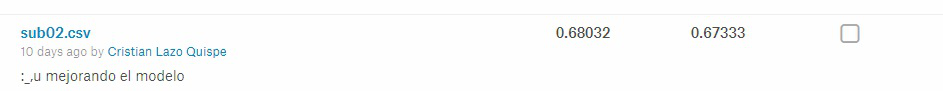

In [0]:
Image.open('2.jpg')